In [1]:
#Logistic Regression and Batch Stochastic Gradient Descent
#1.Load the training set and validation set.
import requests
r1 = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
r2 = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')

from sklearn.datasets import load_svmlight_file
from io import BytesIO
def get_data():
    data_train = load_svmlight_file(f=BytesIO(r1.content),n_features=123)
    data_val = load_svmlight_file(f=BytesIO(r2.content),n_features=123)
    return data_train[0].todense(), data_train[1].reshape((-1, 1)),data_val[0].todense(),data_val[1].reshape((-1, 1))
X_train,y_train,X_val,y_val = get_data()

In [2]:
#preprocess
import numpy as np
samp_num_train,feat_num_train=X_train.shape
samp_num_val,feat_num_val=X_val.shape
X_train = np.column_stack((X_train, np.ones((samp_num_train, 1))))
X_val = np.column_stack((X_val, np.ones((samp_num_val, 1))))

In [3]:
#2.initialize w randomly
w = np.random.random((feat_num_train + 1, 1))  # initialize with random numbers
#w = np.zeros((feat_num_train + 1, 1))

In [4]:
#initialize the param
import random
batch_size=13
learning_rate=0.1
max_epoch_num=30

losses_train = []
losses_val = []
accuracy_list=[]

#the sigmoid function
def sigmoid(z):
     return 1.0/(1 + np.exp(-z))
    
#3.Select the loss function  
def loss(X,y):
    t=0
    for i in range(X.shape[0]):
        t+=np.log(1 + np.exp(-y[i]*np.dot(w.transpose(),X[i].transpose())))
    return t/X.shape[0]    

In [5]:
#3.Select the loss function and calculate its derivation
for epoch in range(max_epoch_num):
    #randomly take some samples
    randIndex = random.sample(range(samp_num_train),batch_size)
    batch_X = X_train[randIndex]
    batch_y = y_train[randIndex]
    s=np.zeros((feat_num_train+1,1))#initialize
    for i in range(batch_size):
        temp=batch_y[i]*np.dot(w.transpose(),batch_X[i].transpose())
        #item():high-dimension array to scalar
        s+=(sigmoid(temp)*batch_y[i]*np.exp(-temp)).item()*batch_X[i].transpose()
    G=-s/batch_size
    w -= learning_rate * G
    #under train set
    loss_train=loss(X_train,y_train).item()
    print(loss_train)
    losses_train.append(loss_train)
    #under valication set
    loss_val=loss(X_val,y_val).item()
    losses_val.append(loss_val)

    #calculate the accuracy rate

    predict_res=[]
    for i in range (X_val.shape[0]):
            class_res = np.dot(w.transpose(),X_val[i].transpose())
            if(class_res >= 0):
                predict_res.append(1)
            if(class_res < 0):
                predict_res.append(-1)
    correct=0
    for i in range(X_val.shape[0]):
            if(predict_res[i]==y_val[i]):
                correct+=1
    auc = correct/X_val.shape[0]
    accuracy_list.append(auc)
print(accuracy_list)
    
    

4.787919815844685
4.387923531285869
3.974242182153949
3.500815135794469
3.060358897503956
2.7392428611486275
2.448043711544832
2.034507030235481
1.7369757090983267
1.4864513928981644
1.2385619864678281
1.1056766437349657
0.9957295676368091
0.8722110067873298
0.7761275193734347
0.7241140996833444
0.7099131045693737
0.6786444708595657
0.6733316232896207
0.6589121434004794
0.6365101501969026
0.6317676464250687
0.6341975593941237
0.6290220738681644
0.6324634190422512
0.611719416352215
0.606470924470176
0.6009821939466056
0.5954530861276045
0.593315354573851
[0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23659480375898287, 0.24107855782814325, 0.2531785516860144, 0.29181254222713593, 0.3380013512683496, 0.3865855905656901, 0.4656962103064922, 0.5426570849456421, 0.5914870093974571, 0.6067809102634973, 0.6393956145199926, 0.644370738898102, 0.6583133714145323, 0.6847245255205454, 0.68761132

Text(0.5, 1.0, 'The graph of Lvadidation and accuracy rate varying with the number of iterations')

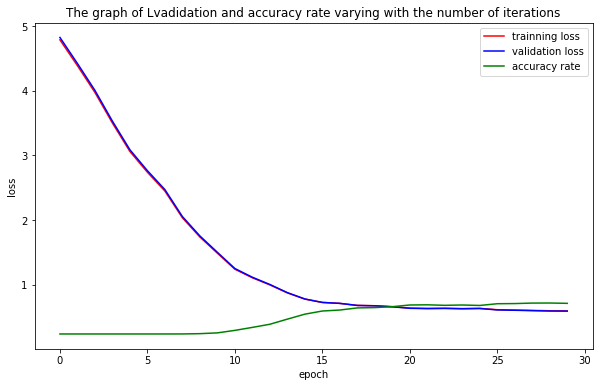

In [6]:

#draw
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(losses_train,color="r", label="trainning loss")
plt.plot(losses_val,color="b", label="validation loss")
plt.plot(accuracy_list,color="g", label="accuracy rate")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of Lvadidation and accuracy rate varying with the number of iterations")